# Семинар по Pytorch.
#### Курс по компьютерному зрению школы MADE.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import sklearn
import PIL


def show_image(image, figsize=(16, 9), reverse=True):
    plt.figure(figsize=figsize)
    if reverse:
        plt.imshow(image[...,::-1])
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    
def show_grayscale_image(image, figsize=(16, 9)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

Установка: https://pytorch.org/get-started/locally/  
В этом ноутбуке будут разобраны основные особенности фреймворка Pytorch. Pytorch - это как Numpy, только умеет эффективно автоматически считать градиенты.

In [19]:
import torch
print (torch.__version__)

1.3.0


In [20]:
import torchvision
from torch import nn
import os
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import tqdm

In [21]:
# проверить, доступна ли у вас cuda. 
torch.cuda.is_available()

True

# Базовые операции

In [22]:
# numpy

x = np.arange(25).reshape(5, 5)

print("X :\n {}\n".format(x))
print("X.shape : {}\n ".format(x.shape))
print("Возвести в квадрат:\n {}\n".format(x * x))
print("X*X^T  :\n {}\n".format(np.matmul(x, x.T)))
print("Cреднее по столбцам :\n {}\n".format(np.mean(x, axis=0)))
print("Сумма по строкам:\n {}\n".format(np.cumsum(x, axis=1)))

X :
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

X.shape : (5, 5)
 
Возвести в квадрат:
 [[  0   1   4   9  16]
 [ 25  36  49  64  81]
 [100 121 144 169 196]
 [225 256 289 324 361]
 [400 441 484 529 576]]

X*X^T  :
 [[  30   80  130  180  230]
 [  80  255  430  605  780]
 [ 130  430  730 1030 1330]
 [ 180  605 1030 1455 1880]
 [ 230  780 1330 1880 2430]]

Cреднее по столбцам :
 [10. 11. 12. 13. 14.]

Сумма по строкам:
 [[  0   1   3   6  10]
 [  5  11  18  26  35]
 [ 10  21  33  46  60]
 [ 15  31  48  66  85]
 [ 20  41  63  86 110]]



In [23]:
# torch

x = torch.arange(25).reshape(5, 5).float()

print("X :\n {}\n".format(x))
print("X.shape : {}\n ".format(x.shape))
print("Возвести в квадрат:\n {}\n".format(x * x))
print("X*X^T  :\n {}\n".format(torch.matmul(x, x.T)))
print("Cреднее по столбцам :\n {}\n".format(torch.mean(x, axis=0)))
print("Сумма по строкам:\n {}\n".format(torch.cumsum(x, axis=1)))

X :
 tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]])

X.shape : torch.Size([5, 5])
 
Возвести в квадрат:
 tensor([[  0.,   1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.,  81.],
        [100., 121., 144., 169., 196.],
        [225., 256., 289., 324., 361.],
        [400., 441., 484., 529., 576.]])

X*X^T  :
 tensor([[  30.,   80.,  130.,  180.,  230.],
        [  80.,  255.,  430.,  605.,  780.],
        [ 130.,  430.,  730., 1030., 1330.],
        [ 180.,  605., 1030., 1455., 1880.],
        [ 230.,  780., 1330., 1880., 2430.]])

Cреднее по столбцам :
 tensor([10., 11., 12., 13., 14.])

Сумма по строкам:
 tensor([[  0.,   1.,   3.,   6.,  10.],
        [  5.,  11.,  18.,  26.,  35.],
        [ 10.,  21.,  33.,  46.,  60.],
        [ 15.,  31.,  48.,  66.,  85.],
        [ 20.,  41.,  63.,  86., 110.]])



# Pytorch - почти Numpy.
Вы можете создавать тензоры, смотреть на их градиенты, не создавая сессии как в tensorflow.
Названия методов очень похожи. Если они отличаются - загляните в таблицу: https://github.com/torch/torch7/wiki/Torch-for-Numpy-users


# Pytroch сам считает backpropagation для нас с помощью модуля autograd

In [24]:
# создаем тензор
preds = torch.zeros(5, requires_grad=True)

# вектор предсказаний
labels = torch.ones(5, requires_grad=True)

# loss: MAE
loss = torch.mean(torch.abs(labels - preds))

print (loss)

# запускаем backprop

loss.backward()

tensor(1., grad_fn=<MeanBackward0>)


In [25]:
# градиенты доступны в поле .grad:
preds.grad

tensor([-0.2000, -0.2000, -0.2000, -0.2000, -0.2000])

In [26]:
# градиенты можно занулить
preds.grad.zero_()

tensor([0., 0., 0., 0., 0.])

In [27]:
# теперь градиенты снова 0
preds.grad

tensor([0., 0., 0., 0., 0.])

###  Градиенты накапливаются при каждом вызове backward()

In [28]:
# создаем тензор
preds = torch.zeros(5, requires_grad=True)

# вектор предсказаний
labels = torch.ones(5, requires_grad=True)

# loss: MAE
loss = torch.mean(torch.abs(labels - preds))

print (loss)

# запускаем backprop
for i in range(5):
    loss.backward(retain_graph=True)
    print (i, preds.grad)

tensor(1., grad_fn=<MeanBackward0>)
0 tensor([-0.2000, -0.2000, -0.2000, -0.2000, -0.2000])
1 tensor([-0.4000, -0.4000, -0.4000, -0.4000, -0.4000])
2 tensor([-0.6000, -0.6000, -0.6000, -0.6000, -0.6000])
3 tensor([-0.8000, -0.8000, -0.8000, -0.8000, -0.8000])
4 tensor([-1., -1., -1., -1., -1.])


# Пишем свою логистическую регрессию на пайторче

In [29]:
from sklearn.datasets import make_blobs
import sklearn
X, y = make_blobs(n_samples=200, centers=((10, 5), (5, -5)), n_features=2,
                   random_state=0, cluster_std=3)

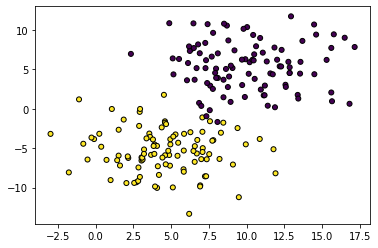

In [33]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# Напоминание. Как это было в Sklearn:

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X, y)

/home/f.kitashov/anaconda3/envs/pytorch_1_3_0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
model.coef_

array([[-0.33884888, -1.25771748]])

In [38]:
model.intercept_

array([1.61293965])

## Визуализируем разделяющую плоскость

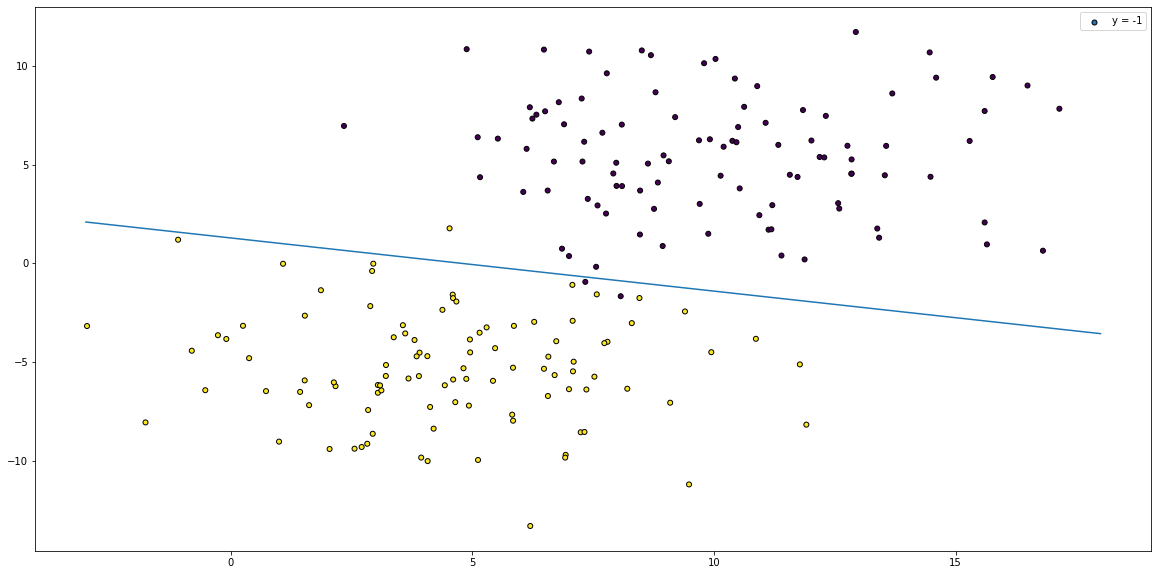

In [39]:
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]
w_0 = model.intercept_[0]

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.legend(['y = -1', 'y = 1'])
x_arr = np.linspace(-3, 18, 1000)

# y_arr = # ваш код здесь
y_arr = -(w_0 + w_1 * x_arr) / w_2
plt.plot(x_arr, y_arr)
plt.show()

# Pytorch

In [40]:
from sklearn.datasets import make_blobs
import sklearn
X, y = make_blobs(n_samples=200, centers=2, n_features=2,
                   random_state=0, cluster_std=0.6)

In [41]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [42]:
X = torch.tensor(X)
y = torch.tensor(y)

In [43]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [44]:
print (X.shape, y.shape)

torch.Size([200, 2]) torch.Size([200])


In [45]:
#w = torch.zeros(2, requires_grad=True)
#b = torch.zeros(1, requires_grad=True)

# cоздайте веса w и отступ b для линейной модели. какие у них должны быть размерности?
# не забудьте выставить нужные значения в поля required_grad и dtype

w = torch.zeros(2)
b = torch.zeros(1)

In [46]:
X[0]

tensor([2.5153, 1.1114], dtype=torch.float64)

In [47]:
y_pred = w * X + b

In [48]:
from sklearn.datasets import make_blobs
import sklearn
X, y = make_blobs(n_samples=200, centers=2, n_features=2,
                   random_state=0, cluster_std=3)

In [49]:
len(X)

200

In [50]:
len(y)

200

# Напишем свою логистическую регрессию на пайторче

In [51]:
X, y = make_blobs(n_samples=200, centers=((10, 5), (5, -5)), n_features=2,
                   random_state=0, cluster_std=3)

In [52]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [53]:
# cоздайте тензор из X и y
X = torch.tensor(X)
y = torch.tensor(y)

In [54]:
assert type(X) == torch.Tensor
assert type(y) == torch.Tensor

In [55]:
# cоздайте веса w и отступ b для линейной модели. какие у них должны быть размерности?
# не забудьте выставить нужные значения в поля required_grad и dtype

w = torch.zeros(2, requires_grad=True, dtype=torch.double)
b = torch.zeros(1, requires_grad=True, dtype=torch.double)

In [56]:
assert w.requires_grad
assert len(w.shape) == 1
assert w.shape[0] == X.shape[1]
assert w.dtype == X.dtype
assert b.requires_grad
assert len(b.shape) == 1
assert b.dtype == X.dtype

In [57]:
def binary_cross_entropy(y, y_predicted):
    """
    y: binary tensor, shape: N, example: [0, 1, 0, 1, 1]
    y_pred: tensor with values from 0 to 1. shape: N. example: [0.2, 0, 1, 0.75, 0.999]
    
    output: tensor, shape: N
    
    """
    return -(y * (torch.log(y_predicted)) + (1 - y) * torch.log(1 - y_predicted))

In [58]:
y_test = torch.tensor([1, 0, 1, 1])
y_pred = torch.tensor([0.7, 0.3, 0.5, 0.9])
bce_correct = torch.tensor([0.3567, 0.3567, 0.6931, 0.1054])
bce_predicted = binary_cross_entropy(y_test, y_pred)
assert bce_predicted.shape == y_test.shape
assert torch.allclose(bce_predicted, bce_correct, rtol=1e-03)

In [59]:
from IPython.display import clear_output

for i in range(1000):
    y_pred = torch.matmul(X, w) + b
    y_pred = torch.sigmoid(y_pred)
    loss = binary_cross_entropy(y, y_pred)
    loss = torch.sum(loss)
    
    loss.backward()
    
    w.data -= 0.00001 * w.grad.data
    b.data -= 0.00001 * b.grad.data

    # zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if (i+1)%5==0:
    #if True:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        
        w_1 = w.data[0]
        w_2 = w.data[1]
        w_0 = b.data[0]
        
        
        x_arr = torch.linspace(-10, 20, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()
        
        print ("Iteration: {}, Loss: {}".format(i, loss))


KeyboardInterrupt: 

# Теперь все за нас делает пайторч

In [106]:
from sklearn.datasets import make_blobs
import sklearn
X, y = make_blobs(n_samples=200, centers=2, n_features=2,
                   random_state=0, cluster_std=0.6)

In [107]:
X, y = make_blobs(n_samples=200, centers=((10, 5), (5, -5)), n_features=2,
                   random_state=0, cluster_std=3)

In [108]:
X = torch.tensor(X)
y = torch.tensor(y)

# Инициализируем модель

In [109]:
model = torch.nn.Linear(2, 1)
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()

Linear(in_features=2, out_features=1, bias=True)

In [114]:
model

Linear(in_features=2, out_features=1, bias=True)

In [115]:
model.weight

Parameter containing:
tensor([[ 0.5161, -0.6115]], requires_grad=True)

In [116]:
model.bias

Parameter containing:
tensor([-0.1380], requires_grad=True)

In [117]:
model.weight.data.dtype

torch.float32

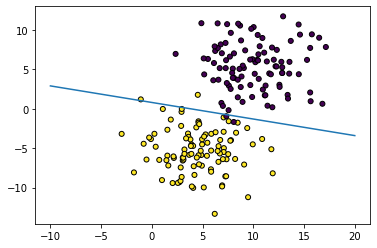

Iteration: 999, Loss: 0.050456251949071884


In [118]:
from IPython.display import clear_output


for i in range(1000):
    
    # считаем предсказание

    y_pred = torch.sigmoid(model(X.float()))
    
    
    # считаем лосс
    
    loss = criterion(y_pred.flatten(), y.float())
    
    # прокидываем градиенты
    
    loss.backward()
    
    
    # делаем шаг оптимизатором
        
    optim.step()     
    
    # зануляем градиенты
    
    optim.zero_grad() 
    
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        
        w_1 = model.weight.data[0][0]
        w_2 = model.weight.data[0][1]

        w_0 = model.bias.data[0]
        
        
        x_arr = torch.linspace(-10, 20, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()
        
        print ("Iteration: {}, Loss: {}".format(i, loss))

# Окей, пусть теперь проблема нелинейная

In [123]:
from sklearn.datasets import make_moons

In [124]:
X, y = make_moons(n_samples=200, noise=.1, random_state=17)

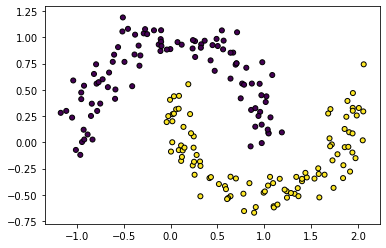

In [125]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

X = torch.tensor(X)
y = torch.tensor(y)

In [126]:
model = torch.nn.Linear(2, 1)
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

model.train()

Linear(in_features=2, out_features=1, bias=True)

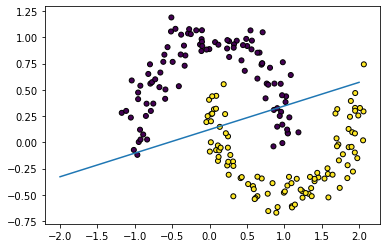

Iteration: 29999, Loss: 0.2655724585056305


In [127]:
from IPython.display import clear_output


for i in range(30000):

    y_pred = torch.sigmoid(model(X.float()))

    loss = criterion(y_pred.flatten(), y.float())
    
    loss.backward()
    
    optim.step()           
    optim.zero_grad() 
    
    if (i+1)%500==0:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')


        w_1 = model.weight.data[0][0]
        w_2 = model.weight.data[0][1] 
        w_0 = model.bias.data[0]
        
        
        x_arr = torch.linspace(-2, 2, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()
        
        print ("Iteration: {}, Loss: {}".format(i, loss))

# Визуализируем разделяющую плоскость

In [128]:
h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
model.eval()
Z = torch.sigmoid(model(input_tensor))
Z = Z.reshape(xx.shape)

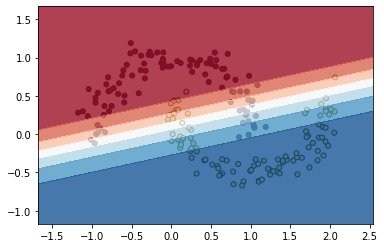

In [129]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

plt.show()

# Делаем модель сложнее

/home/f.kitashov/anaconda3/envs/pytorch_1_3_0/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/home/f.kitashov/anaconda3/envs/pytorch_1_3_0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


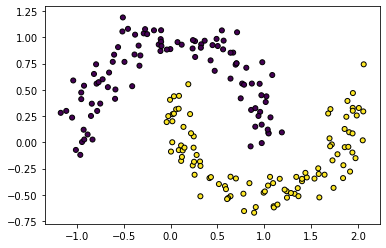

In [130]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

X = torch.tensor(X)
y = torch.tensor(y)

In [131]:
from torch import nn

# Cоберите двуслойную модель

In [132]:
model = nn.Sequential()
model.add_module('first', nn.Linear(2, 2))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(2, 1))

In [133]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2.)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=2, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=2, out_features=1, bias=True)
)

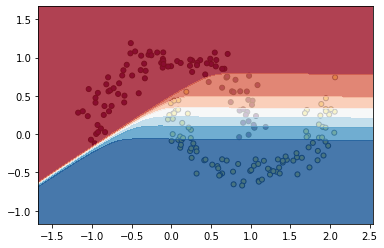

Iteration: 29999, Loss: 0.2223578691482544


In [134]:
from IPython.display import clear_output


h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



model.train()
for i in range(30000):
    
    y_pred = torch.sigmoid(model(X.float()))
        
    loss = criterion(y_pred.flatten(), y.float())
    
    loss.backward()
        
    optim.step()           
    optim.zero_grad() 
    if (i+1)%500==0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

        plt.show()
        
        
        print ("Iteration: {}, Loss: {}".format(i, loss))

# Усложним модель (увеличим количество слоев)

In [136]:
model = nn.Sequential()
model.add_module('first', nn.Linear(2, 2))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(2, 2))
model.add_module('second_activation', nn.Sigmoid())
model.add_module('third', nn.Linear(2, 1))

In [137]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2., momentum=0.9)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=2, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=2, out_features=2, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=2, out_features=1, bias=True)
)

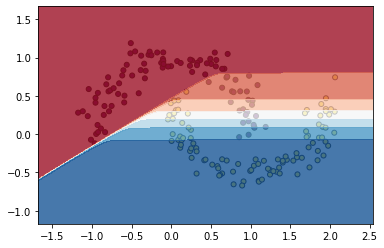

Iteration: 29999, Loss: 0.2274797260761261


In [138]:
from IPython.display import clear_output


h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



model.train()
for i in range(30000):
    
    y_pred = torch.sigmoid(model(X.float()))
    
    loss = criterion(y_pred.flatten(), y.float())
    
    loss.backward()
        
    optim.step()           
    optim.zero_grad() 
    if (i+1)%500==0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

        plt.show()
        
        
        print ("Iteration: {}, Loss: {}".format(i, loss))

# Еще усложним модель (увеличим размерность скрытых слоев)

In [139]:
model = nn.Sequential()
model.add_module('first', nn.Linear(2, 5))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(5, 5))
model.add_module('second_activation', nn.Sigmoid())
model.add_module('third', nn.Linear(5, 1))
model.add_module('third_activation', nn.Sigmoid())

In [140]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2, momentum=0.9)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=5, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=5, out_features=5, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=5, out_features=1, bias=True)
  (third_activation): Sigmoid()
)

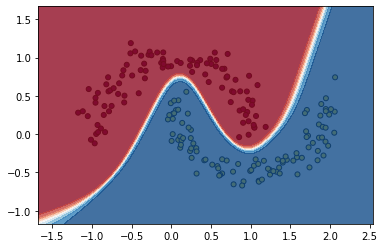

Iteration: 2999, Loss: 2.9443554012686945e-05


In [141]:
from IPython.display import clear_output


h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



model.train()
for i in range(3000):

    y_pred = model(X.float())
        
    loss = criterion(y_pred.flatten(), y.float())
    
    loss.backward()
    
    optim.step()           
    optim.zero_grad() 
    if (i+1)%50==0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

        plt.show()
        
        
        print ("Iteration: {}, Loss: {}".format(i, loss))

# Сделаем > 2 классов

In [142]:
from sklearn.datasets import make_circles

In [143]:
# blobs with varied variances
X, y = make_blobs(n_samples=400,
                             cluster_std=[1.0, 1.5, 0.5],
                             random_state=17)

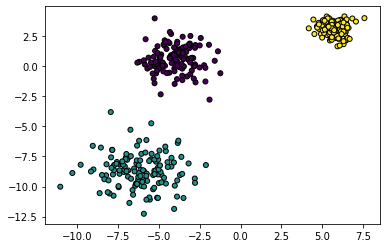

In [144]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

X = torch.tensor(X)
y = torch.tensor(y)

In [175]:
model = nn.Sequential()
model.add_module('first', nn.Linear(2, 5))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(5, 5))
model.add_module('second_activation', nn.Sigmoid())
model.add_module('third', nn.Linear(5, 3))

In [176]:
criterion = torch.nn.CrossEntropyLoss()

optim = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=5, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=5, out_features=5, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=5, out_features=3, bias=True)
)

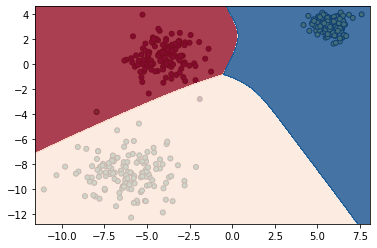

Iteration: 999, Loss: 0.05673159286379814


In [177]:
from IPython.display import clear_output


h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



model.train()
for i in range(1000):
    
    y_pred = model(X.float())
    
    loss = criterion(y_pred, y)
    
    loss.backward()
    
    optim.step()           
    optim.zero_grad() 
    if (i+1)%25==0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = model(input_tensor)
        Z = torch.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)
        
        plt.show()
        
        
        print ("Iteration: {}, Loss: {}".format(i, loss))

# Cверточные сети

In [149]:
# cоздадим свертку
layer = torch.nn.Conv2d(1, 1, kernel_size=3)

In [150]:
layer.weight

Parameter containing:
tensor([[[[ 0.1212, -0.2716, -0.0566],
          [-0.2161,  0.1436,  0.2578],
          [ 0.0517, -0.2397, -0.0228]]]], requires_grad=True)

In [151]:
# вес доступен через .weight.data
layer.weight.data = torch.ones_like(layer.weight.data) 
layer.weight.data /= torch.sum(layer.weight.data)

In [152]:
layer.weight.data

tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]])

In [153]:
layer.bias.data = torch.zeros_like(layer.bias.data)

In [154]:
layer.eval()

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [155]:
input_tensor = torch.arange(9).reshape(1, 1, 3, 3)

In [156]:
input_tensor.shape

torch.Size([1, 1, 3, 3])

In [157]:
input_tensor

tensor([[[[0, 1, 2],
          [3, 4, 5],
          [6, 7, 8]]]])

In [158]:
output_tensor = layer(input_tensor.float())

In [159]:
output_tensor

tensor([[[[4.]]]], grad_fn=<MkldnnConvolutionBackward>)

# Модификация весов свертки

In [161]:
file = './data/photos/lecun.jpeg'

In [162]:
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [165]:
assert img.shape == (3960, 2640)

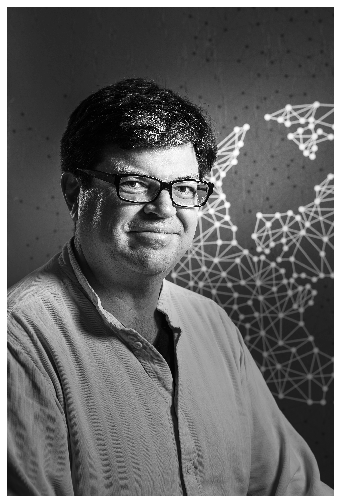

In [166]:
show_grayscale_image(img)

In [189]:
# получим функцию, которая переводит изображение в тензор
to_tensor = torchvision.transforms.ToTensor()

In [190]:
img_tensor = to_tensor(img)

In [191]:
img_tensor.shape

torch.Size([1, 3960, 2640])

In [192]:
img_tensor = img_tensor.unsqueeze(0)

In [193]:
assert img_tensor.shape == torch.Size([1, 1, 3960, 2640])

### Создадим свертку, которая размоет изображение

In [194]:
kernel_size = 50
layer = torch.nn.Conv2d(1, 1, kernel_size=kernel_size)

In [195]:
layer.weight.data = torch.ones_like(layer.weight.data) 
layer.weight.data /= torch.sum(layer.weight.data)

In [196]:
layer.weight.data

tensor([[[[0.0004, 0.0004, 0.0004,  ..., 0.0004, 0.0004, 0.0004],
          [0.0004, 0.0004, 0.0004,  ..., 0.0004, 0.0004, 0.0004],
          [0.0004, 0.0004, 0.0004,  ..., 0.0004, 0.0004, 0.0004],
          ...,
          [0.0004, 0.0004, 0.0004,  ..., 0.0004, 0.0004, 0.0004],
          [0.0004, 0.0004, 0.0004,  ..., 0.0004, 0.0004, 0.0004],
          [0.0004, 0.0004, 0.0004,  ..., 0.0004, 0.0004, 0.0004]]]])

In [197]:
layer.bias.data = torch.zeros_like(layer.bias.data)

In [198]:
layer.eval()

Conv2d(1, 1, kernel_size=(50, 50), stride=(1, 1))

In [200]:
output_tensor = layer(img_tensor)

In [201]:
output_tensor.shape

torch.Size([1, 1, 3911, 2591])

In [202]:
# функция, переводящее тензор в PIL-изображение
to_pil_image = transforms.ToPILImage()

In [203]:
output_img = to_pil_image(output_tensor.squeeze(0))

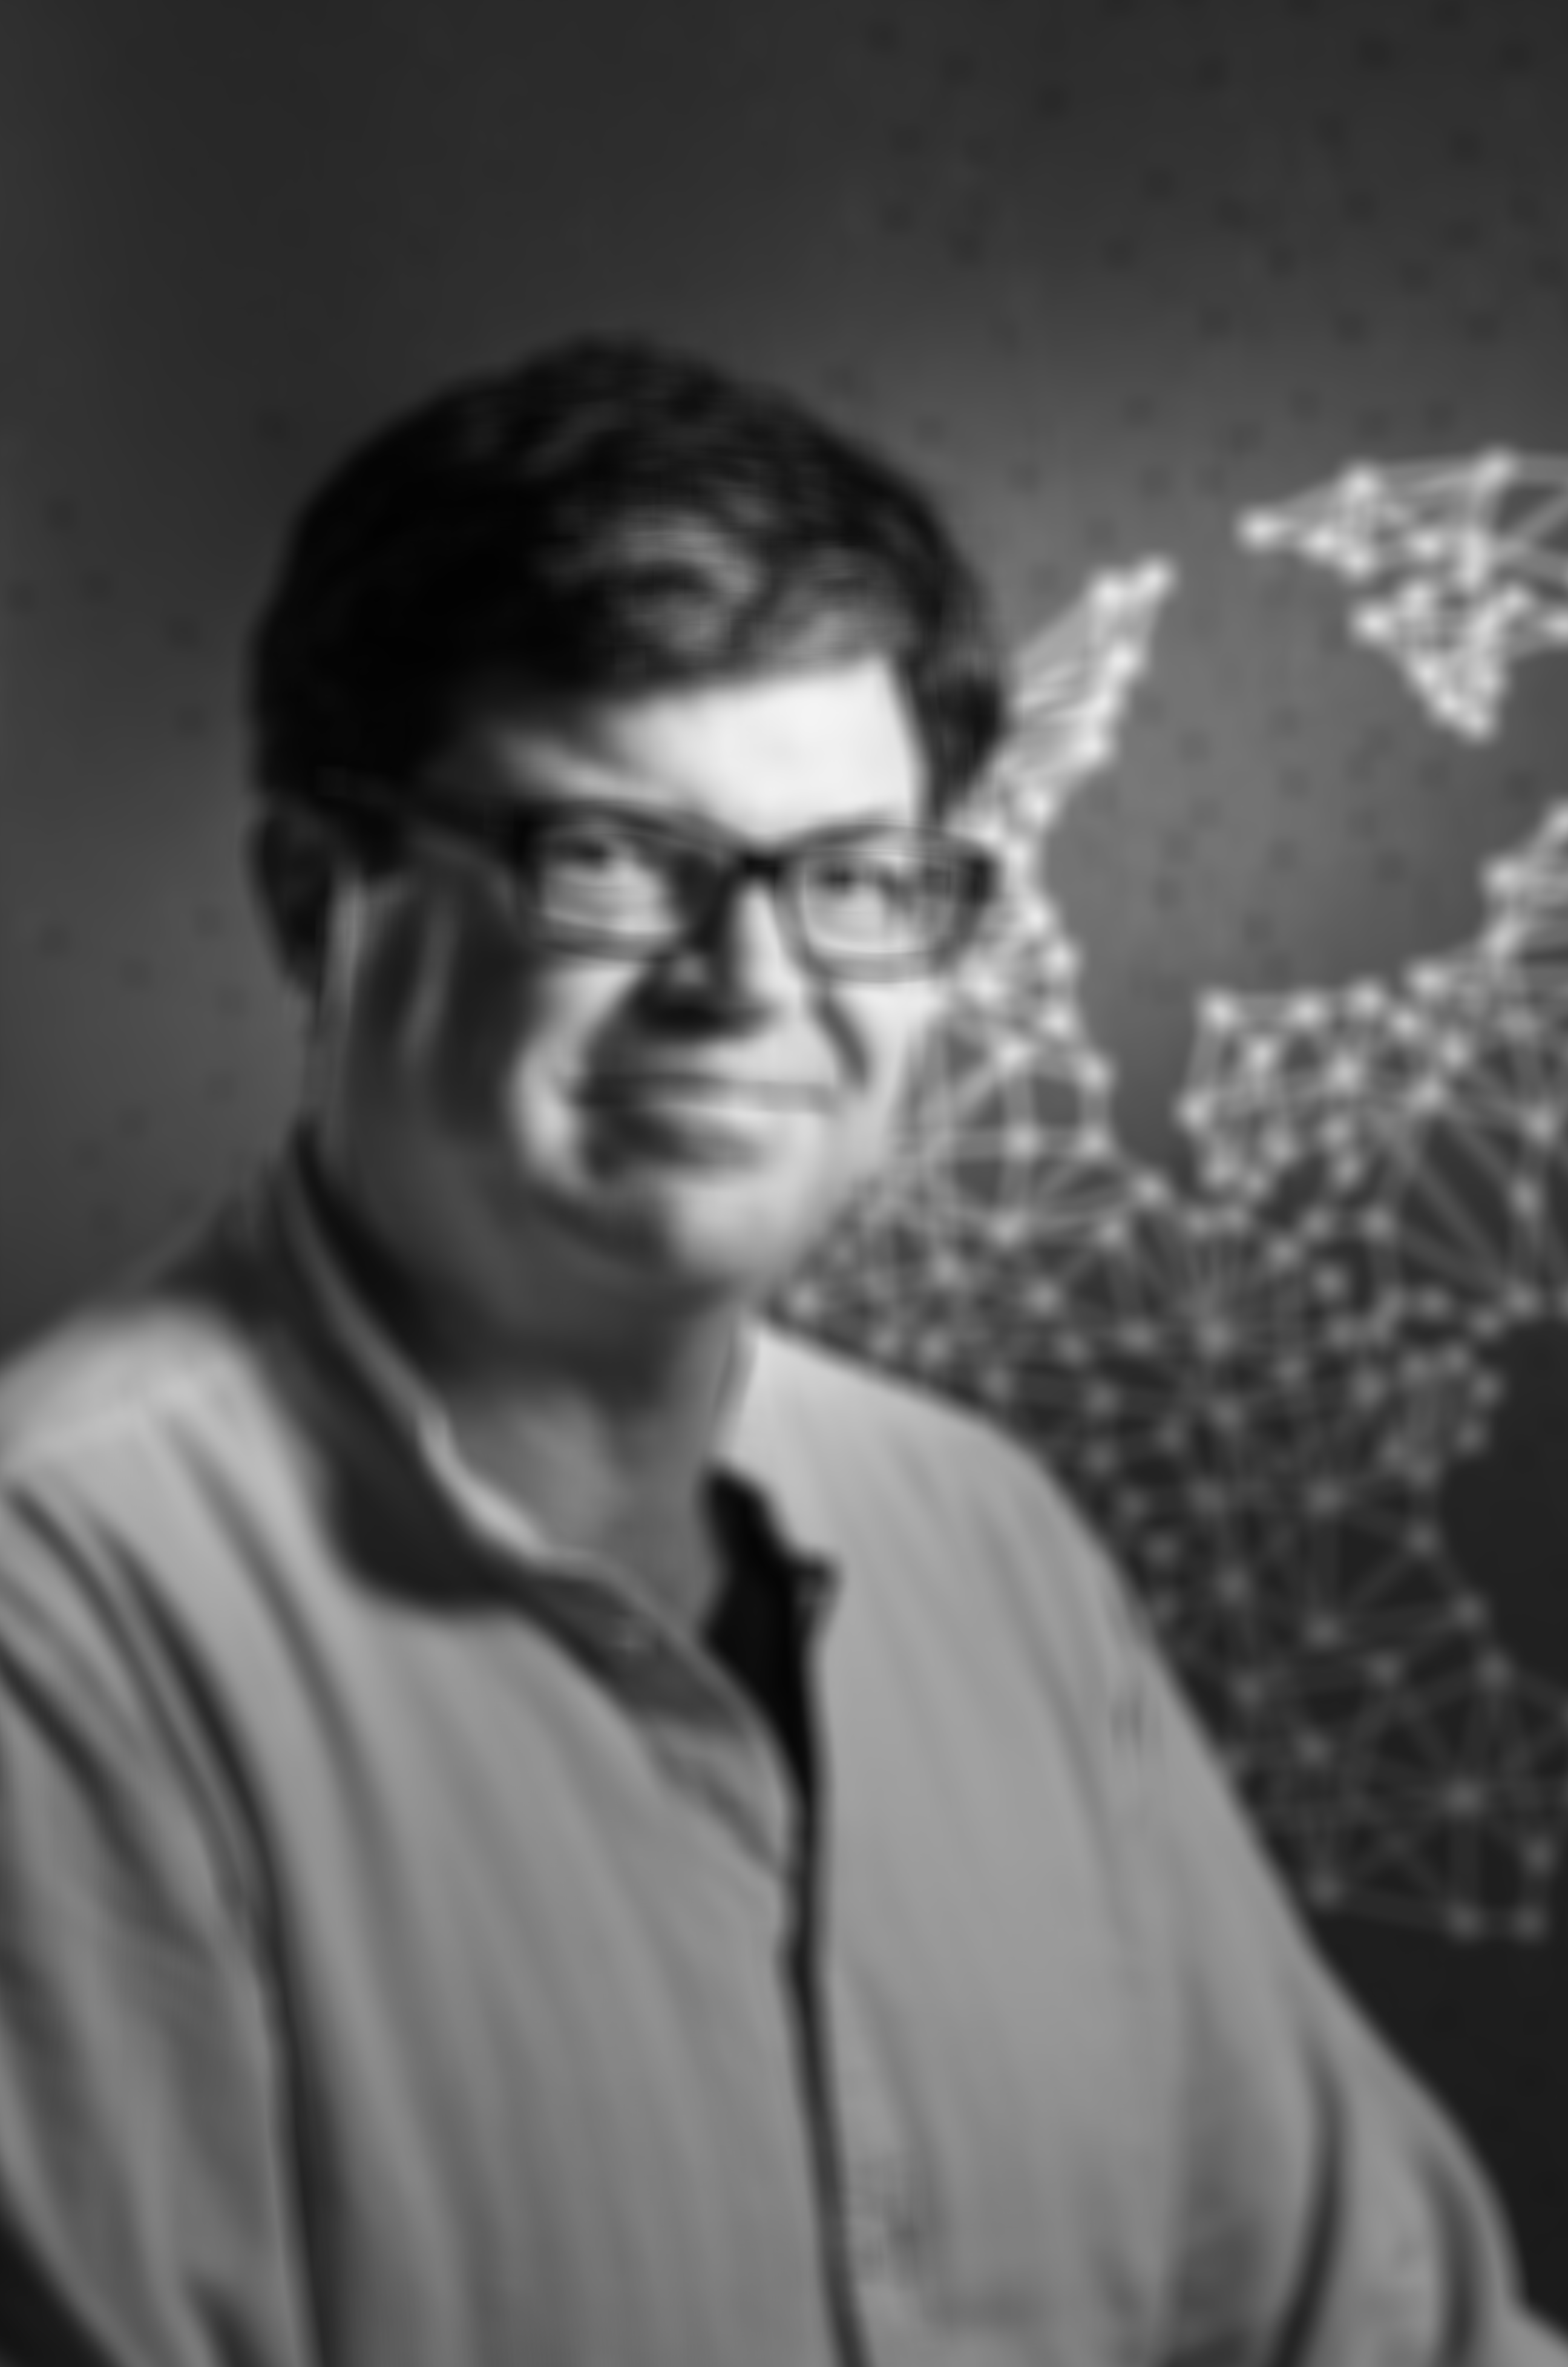

In [204]:
output_img

# Посмотрим на границы

In [205]:
kernel_size = 3
layer = torch.nn.Conv2d(1, 1, kernel_size=kernel_size)

In [206]:
layer.weight.data = torch.ones_like(layer.weight.data) * -1
layer.weight.data[0][0][kernel_size//2][kernel_size//2] = kernel_size ** 2 - 1

In [207]:
layer.weight.data

tensor([[[[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]]]])

In [208]:
torch.sum(layer.weight.data)

tensor(0.)

In [209]:
layer.weight.data[0][0][kernel_size//2][kernel_size//2]

tensor(8.)

In [210]:
layer.bias.data = torch.zeros_like(layer.bias.data)

In [211]:
layer.eval()

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [213]:
output_tensor = layer(img_tensor)

In [214]:
output_tensor.shape

torch.Size([1, 1, 3958, 2638])

In [215]:
output_tensor[output_tensor < 0] = 0
output_tensor[output_tensor > 1] = 1

In [216]:
to_pil_image = transforms.ToPILImage()

In [217]:
output_img = to_pil_image(output_tensor.squeeze(0))

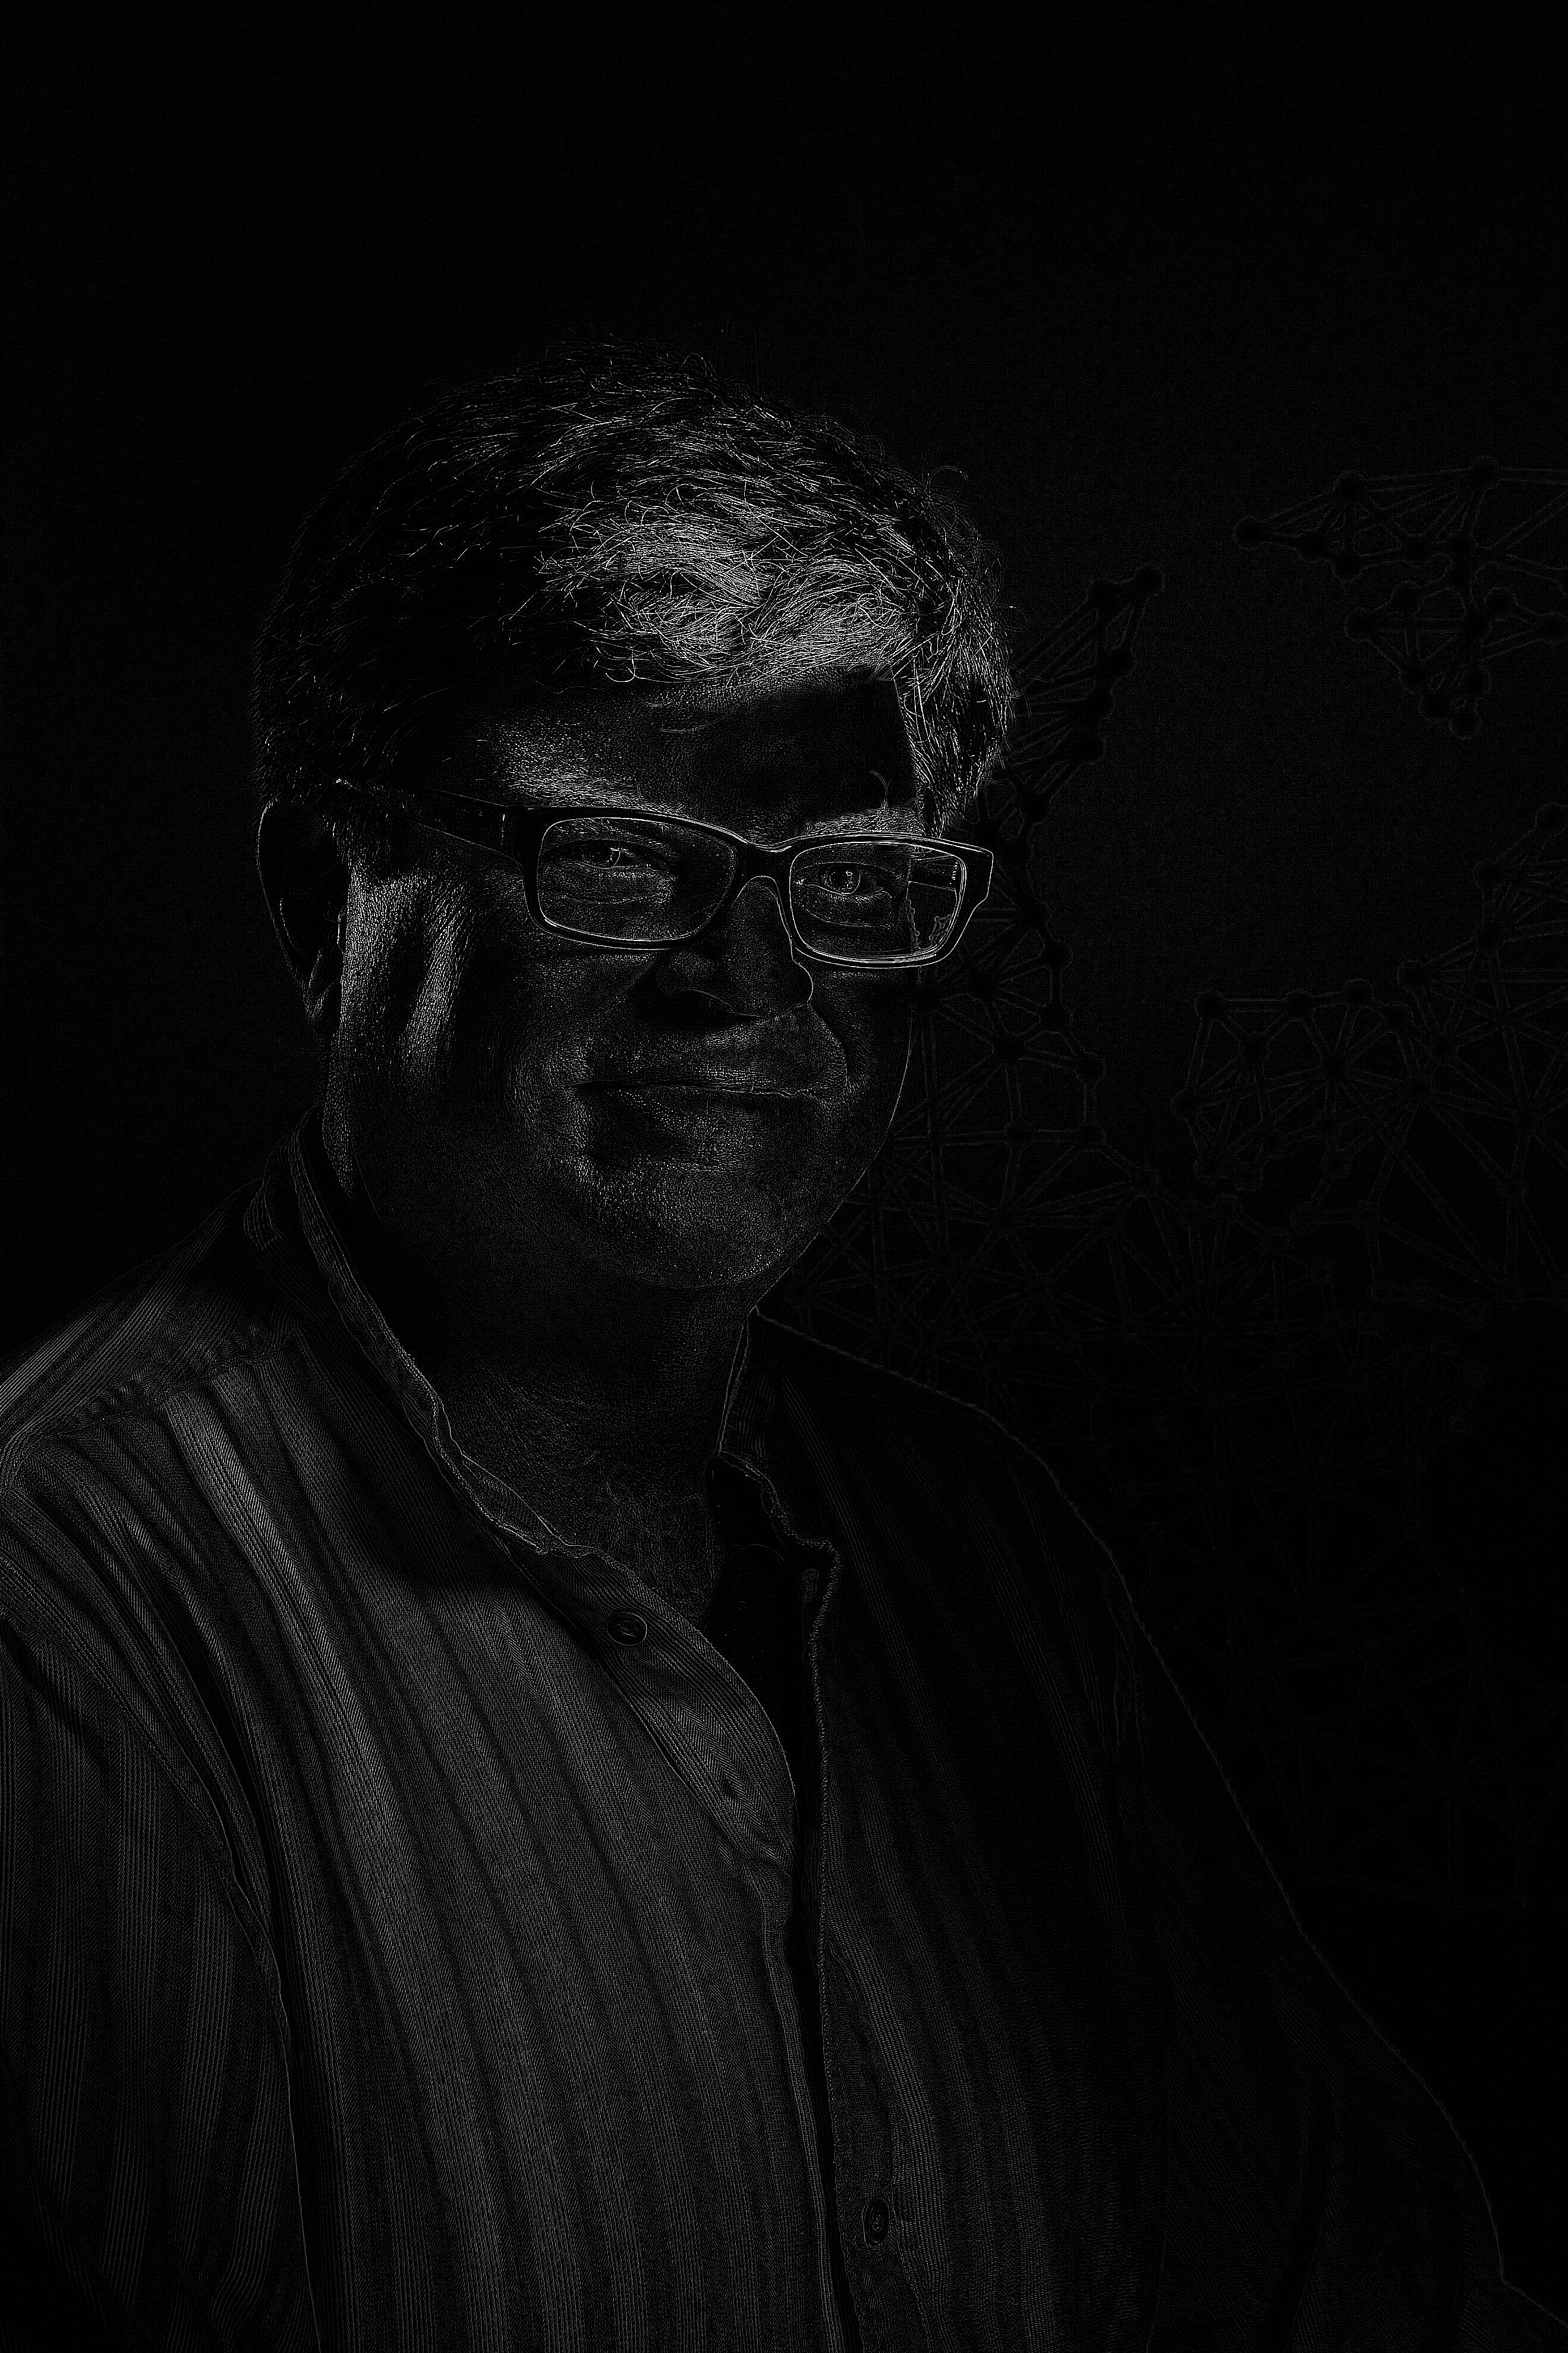

In [218]:
output_img

# Окей, давайте поработаем с картинками

In [10]:
import torchvision
from torch import nn
import os
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import tqdm

In [11]:
root = './data'
if not os.path.exists(root):
    os.mkdir(root)
    
trans = transforms.Compose([transforms.ToTensor(), 
                            transforms.Normalize((0.5,), (1.0,))])

train_set = MNIST(root=root, train=True, transform=trans, download=True)
test_set = MNIST(root=root, train=False, transform=trans, download=True)

In [12]:
batch_size = 50

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)

Class: 5


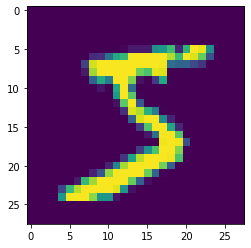

In [12]:
# посмотрим как выглядят картинки
print ("Class: {}".format(train_set[0][1]))
plt.imshow(train_set[0][0][0].numpy())
plt.show()

# Обучим бэйзлайн

In [38]:
model = nn.Sequential()
model.add_module('flatten', nn.Flatten())
model.add_module('first', nn.Linear(28 * 28, 600))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(600, 400))
model.add_module('second_activation', nn.Sigmoid())
model.add_module('third', nn.Linear(400, 200))
model.add_module('third_activation', nn.Sigmoid())
model.add_module('forth', nn.Linear(200, 64))
model.add_module('forth_activation', nn.Sigmoid())
model.add_module('final', nn.Linear(64, 10))

In [39]:
model.cuda()

Sequential(
  (flatten): Flatten()
  (first): Linear(in_features=784, out_features=600, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=600, out_features=400, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=400, out_features=200, bias=True)
  (third_activation): Sigmoid()
  (forth): Linear(in_features=200, out_features=64, bias=True)
  (forth_activation): Sigmoid()
  (final): Linear(in_features=64, out_features=10, bias=True)
)

In [40]:
criterion = torch.nn.CrossEntropyLoss()

optim = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.9)

model.train()

Sequential(
  (flatten): Flatten()
  (first): Linear(in_features=784, out_features=600, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=600, out_features=400, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=400, out_features=200, bias=True)
  (third_activation): Sigmoid()
  (forth): Linear(in_features=200, out_features=64, bias=True)
  (forth_activation): Sigmoid()
  (final): Linear(in_features=64, out_features=10, bias=True)
)

In [42]:
for epoch in range(20):
    # trainning
    ave_loss = 0
    model.train()
    for batch_idx, (x, target) in enumerate(train_loader):
        out = model(x.cuda())
        loss = criterion(out, target.cuda())
        loss.backward()
        optim.step()
        optim.zero_grad()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print ('==>>> epoch: {}, batch index: {}, train loss: {:.6f}'.format(
                epoch, batch_idx+1, loss))

    
    # testing
    correct_cnt, ave_loss = 0., 0.
    total_cnt = 0.
    model.eval()
    for batch_idx, (x, target) in enumerate(test_loader):
        with torch.no_grad():
            out = model(x.cuda())
        loss = criterion(out, target.cuda())
        pred_label = torch.argmax(out, axis=1)
        total_cnt += x.shape[0]
        correct_cnt += (pred_label.cpu() == target.detach()).sum()
        
    print ('===========>>> Test epoch: {} test loss: {:.6f}, test acc: {:.3f}'.format(
        epoch, loss, correct_cnt / total_cnt))

==>>> epoch: 0, batch index: 100, train loss: 2.283175
==>>> epoch: 0, batch index: 200, train loss: 2.318208
==>>> epoch: 0, batch index: 300, train loss: 2.346493
==>>> epoch: 0, batch index: 400, train loss: 2.351471
==>>> epoch: 0, batch index: 500, train loss: 2.366902
==>>> epoch: 0, batch index: 600, train loss: 2.316712
==>>> epoch: 0, batch index: 700, train loss: 2.320808
==>>> epoch: 0, batch index: 800, train loss: 2.304109
==>>> epoch: 0, batch index: 900, train loss: 2.382879
==>>> epoch: 0, batch index: 1000, train loss: 2.270531
==>>> epoch: 0, batch index: 1100, train loss: 2.317448
==>>> epoch: 0, batch index: 1200, train loss: 2.315577
===========>>> Test epoch: 0 test loss: 2.318429, test acc: 0.113
==>>> epoch: 1, batch index: 100, train loss: 2.288396
==>>> epoch: 1, batch index: 200, train loss: 2.317489
==>>> epoch: 1, batch index: 300, train loss: 2.324648
==>>> epoch: 1, batch index: 400, train loss: 2.306442
==>>> epoch: 1, batch index: 500, train loss: 2.335

==>>> epoch: 11, batch index: 400, train loss: 0.296508
==>>> epoch: 11, batch index: 500, train loss: 0.224088
==>>> epoch: 11, batch index: 600, train loss: 0.088157
==>>> epoch: 11, batch index: 700, train loss: 0.062659
==>>> epoch: 11, batch index: 800, train loss: 0.161666
==>>> epoch: 11, batch index: 900, train loss: 0.121619
==>>> epoch: 11, batch index: 1000, train loss: 0.114639
==>>> epoch: 11, batch index: 1100, train loss: 0.062672
==>>> epoch: 11, batch index: 1200, train loss: 0.074061
===========>>> Test epoch: 11 test loss: 0.185481, test acc: 0.950
==>>> epoch: 12, batch index: 100, train loss: 0.012154
==>>> epoch: 12, batch index: 200, train loss: 0.109589
==>>> epoch: 12, batch index: 300, train loss: 0.062654
==>>> epoch: 12, batch index: 400, train loss: 0.150447
==>>> epoch: 12, batch index: 500, train loss: 0.129625
==>>> epoch: 12, batch index: 600, train loss: 0.047463
==>>> epoch: 12, batch index: 700, train loss: 0.033923
==>>> epoch: 12, batch index: 800,

# Соберем сверточную сеть

In [5]:
model = nn.Sequential()
model.add_module('0', nn.Conv2d(1, 64, kernel_size=(3, 3), padding=1))
model.add_module('1', nn.BatchNorm2d(64))
model.add_module('2', nn.ReLU())
model.add_module('3', nn.MaxPool2d(kernel_size=2, stride=2))
model.add_module('4', nn.Conv2d(64, 128, kernel_size=(3, 3), padding=1))
model.add_module('5', nn.BatchNorm2d(128))
model.add_module('6', nn.ReLU())
model.add_module('flatten', nn.Flatten())
model.add_module('7', nn.Linear(in_features=25088, out_features=4096))
model.add_module('8', nn.ReLU())
model.add_module('9', nn.Dropout(p=0.5))
model.add_module('10', nn.Linear(in_features=4096, out_features=4096))
model.add_module('11', nn.ReLU())
model.add_module('12', nn.Dropout(p=0.5))
model.add_module('13', nn.Linear(in_features=4096, out_features=10))

In [6]:
model.cuda()

Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (flatten): Flatten()
  (7): Linear(in_features=25088, out_features=4096, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=4096, out_features=4096, bias=True)
  (11): ReLU()
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=4096, out_features=10, bias=True)
)

In [7]:
criterion = torch.nn.CrossEntropyLoss()

optim = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

model.train()

Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (flatten): Flatten()
  (7): Linear(in_features=25088, out_features=4096, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=4096, out_features=4096, bias=True)
  (11): ReLU()
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=4096, out_features=10, bias=True)
)

In [8]:
torch.cuda.empty_cache()

In [13]:
for epoch in range(20):
    # trainning
    ave_loss = 0
    model.train()
    for batch_idx, (x, target) in enumerate(train_loader):
        x = x.cuda()
        target = target.cuda()
        out = model(x)
        loss = criterion(out, target)
        loss.backward()
        optim.step()
        optim.zero_grad()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print ('==>>> epoch: {}, batch index: {}, train loss: {:.6f}'.format(
                epoch, batch_idx+1, loss))

    
    # testing
    correct_cnt, ave_loss = 0., 0.
    total_cnt = 0.
    model.eval()
    for batch_idx, (x, target) in enumerate(test_loader):
        with torch.no_grad():
            out = model(x.cuda())
        loss = criterion(out, target.cuda())
        pred_label = torch.argmax(out, axis=1)
        total_cnt += x.shape[0]
        correct_cnt += (pred_label.cpu() == target.detach()).sum()
        
    print ('===========>>> Test epoch: {} test loss: {:.6f}, test acc: {:.3f}'.format(
        epoch, loss, correct_cnt / total_cnt))

==>>> epoch: 0, batch index: 100, train loss: 0.847813
==>>> epoch: 0, batch index: 200, train loss: 2.352518
==>>> epoch: 0, batch index: 300, train loss: 1.312366
==>>> epoch: 0, batch index: 400, train loss: 1.189502
==>>> epoch: 0, batch index: 500, train loss: 0.889535
==>>> epoch: 0, batch index: 600, train loss: 0.904678
==>>> epoch: 0, batch index: 700, train loss: 0.913921
==>>> epoch: 0, batch index: 800, train loss: 2.280055
==>>> epoch: 0, batch index: 900, train loss: 2.306484
==>>> epoch: 0, batch index: 1000, train loss: 2.314514
==>>> epoch: 0, batch index: 1100, train loss: 2.304783
==>>> epoch: 0, batch index: 1200, train loss: 2.297327
===========>>> Test epoch: 0 test loss: 2.290198, test acc: 0.113
==>>> epoch: 1, batch index: 100, train loss: 2.313712
==>>> epoch: 1, batch index: 200, train loss: 2.315439
==>>> epoch: 1, batch index: 300, train loss: 2.312515
==>>> epoch: 1, batch index: 400, train loss: 2.305142
==>>> epoch: 1, batch index: 500, train loss: 2.307

KeyboardInterrupt: 